In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
emotions = pd.read_csv("FRIENDS_EMOTION.csv")
emotions

,season,episode,scene,utterance,emotion,EPISODE_ID
0,1,1,4,1,Mad,S1E1
1,1,1,4,3,Neutral,S1E1
2,1,1,4,4,Joyful,S1E1
3,1,1,4,5,Neutral,S1E1
4,1,1,4,6,Neutral,S1E1
...,...,...,...,...,...,...
12601,4,24,25,2,Neutral,S4E24
12602,4,24,25,3,Neutral,S4E24
12603,4,24,25,4,Neutral,S4E24
12604,4,24,25,5,Joyful,S4E24


In [38]:
script = pd.read_csv("script_clean.csv")
script

,text,speaker,season,episode,scene,utterance,EPISODE_ID
0,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1,1,1,S1E1
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,1,1,1,2,S1E1
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,1,1,1,3,S1E1
3,"Wait, does he eat chalk?",Phoebe Buffay,1,1,1,4,S1E1
4,"Just, 'cause, I don't want her to go through w...",Phoebe Buffay,1,1,1,6,S1E1
...,...,...,...,...,...,...,...
61305,"Oh, it's gonna be okay.",Chandler Bing,10,18,11,17,S10E18
61306,Do you guys have to go to the new house right ...,Rachel Green,10,18,11,18,S10E18
61307,We got some time.,Monica Geller,10,18,11,19,S10E18
61308,"Okay, should we get some coffee?",Rachel Green,10,18,11,20,S10E18


In [39]:
emotions["emotion"].unique()

array(['Mad', 'Neutral', 'Joyful', 'Scared', 'Sad', 'Powerful',
       'Peaceful'], dtype=object)

Emoce:\
Mad\
Neutral\
Joyful\
Scared\
Sad\
Powerful\
Peaceful


In [96]:
script.describe()

,season,episode,scene,utterance
count,61310.000000,61310.000000,61310.000000,61310.000000
mean,5.470494,12.553384,6.795792,18.614043
std,2.815393,6.957823,4.242605,21.133382
min,1.000000,1.000000,1.000000,0.000000
25%,3.000000,7.000000,3.000000,7.000000
50%,5.000000,13.000000,6.000000,13.000000
75%,8.000000,18.000000,10.000000,23.000000
max,10.000000,25.000000,29.000000,255.000000


In [95]:
emotions.describe()

,season,episode,scene,utterance
count,12606.000000,12606.000000,12606.000000,12606.000000
mean,2.572902,13.193241,7.518483,9.804776
std,1.109066,7.202920,4.427665,5.941381
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,7.000000,4.000000,5.000000
50%,3.000000,14.000000,7.000000,9.000000
75%,4.000000,20.000000,11.000000,14.000000
max,4.000000,25.000000,29.000000,30.000000


In [40]:
merged = pd.merge(
    script,
    emotions,
    on=["EPISODE_ID", "season", "episode", "scene", "utterance"],
    how="inner"
)
merged

,text,speaker,season,episode,scene,utterance,EPISODE_ID,emotion
0,I'm supposed to attach a brackety thing to the...,Ross Geller,1,1,4,1,S1E1,Mad
1,I'm thinking we've got a bookcase here.,Joey Tribbiani,1,1,4,3,S1E1,Neutral
2,It's a beautiful thing.,Chandler Bing,1,1,4,4,S1E1,Joyful
3,What's this?,Joey Tribbiani,1,1,4,5,S1E1,Neutral
4,I would have to say that is an 'L'-shaped brac...,Chandler Bing,1,1,4,6,S1E1,Neutral
...,...,...,...,...,...,...,...,...
12601,"Ahh, yes, I will have a glass of the Merlot",Rachel Green,4,24,25,2,S4E24,Neutral
12602,Okay.,Air Hostess,4,24,25,3,S4E24,Neutral
12603,"And uh, he will have a white wine spritzer.",Rachel Green,4,24,25,4,S4E24,Neutral
12604,"Okay, good. Thank you. I'll be back shortly, a...",Air Hostess,4,24,25,5,S4E24,Joyful


In [41]:
emotion_counts = (
    merged.groupby(["speaker", "emotion"])
    .size()
    .reset_index(name="count")
)
emotion_counts

,speaker,emotion,count
0,#ALL#,Joyful,31
1,#ALL#,Mad,9
2,#ALL#,Neutral,27
3,#ALL#,Peaceful,5
4,#ALL#,Powerful,2
...,...,...,...
850,Woman,Neutral,4
851,Woman,Peaceful,3
852,Woman,Scared,3
853,Woman On Train,Joyful,3


In [42]:
main_chars = ["Ross Geller", "Rachel Green", "Monica Geller", "Chandler Bing", "Joey Tribbiani", "Phoebe Buffay"]

emotion_counts = emotion_counts[emotion_counts["speaker"].isin(main_chars)]
emotion_counts

emotion_counts.to_csv("emotion_counts_main_characters.csv", index=False)

In [43]:
top_emotions = (
    emotion_counts.loc[emotion_counts.groupby("speaker")["count"].idxmax()]
    .reset_index(drop=True)
)
top_emotions

,speaker,emotion,count
0,Chandler Bing,Neutral,537
1,Joey Tribbiani,Neutral,466
2,Monica Geller,Neutral,476
3,Phoebe Buffay,Neutral,446
4,Rachel Green,Neutral,417
5,Ross Geller,Neutral,506


In [44]:
merged["emotion"].value_counts(normalize=True) * 100

emotion
Neutral     29.953990
Joyful      21.854672
Scared      13.049342
Mad         10.566397
Peaceful     9.447882
Powerful     8.432492
Sad          6.695224
Name: proportion, dtype: float64

In [48]:
emotion_totals = (
    emotion_counts
    .groupby("emotion")["count"]
    .sum()
    .sort_values(ascending=True)
)
emotion_totals

emotion
Sad          668
Powerful     765
Peaceful     918
Mad         1100
Scared      1367
Joyful      2110
Neutral     2848
Name: count, dtype: int64

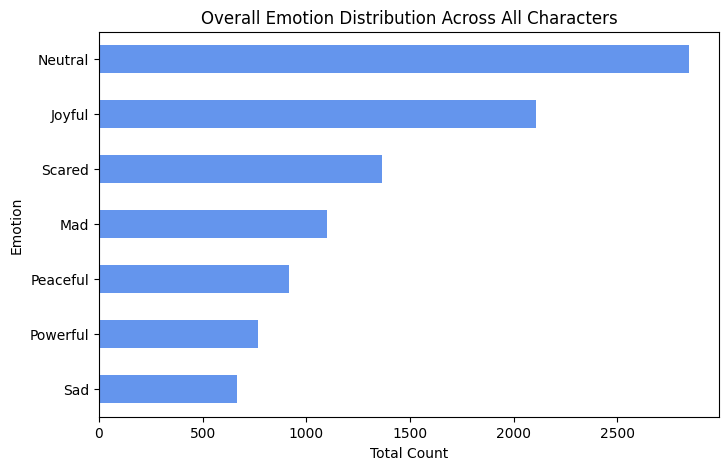

In [51]:
emotion_totals.plot(
    kind="barh",
    color="cornflowerblue",
    figsize=(8, 5),
    title="Overall Emotion Distribution Across All Characters"
)

plt.xlabel("Total Count")
plt.ylabel("Emotion")
plt.show()

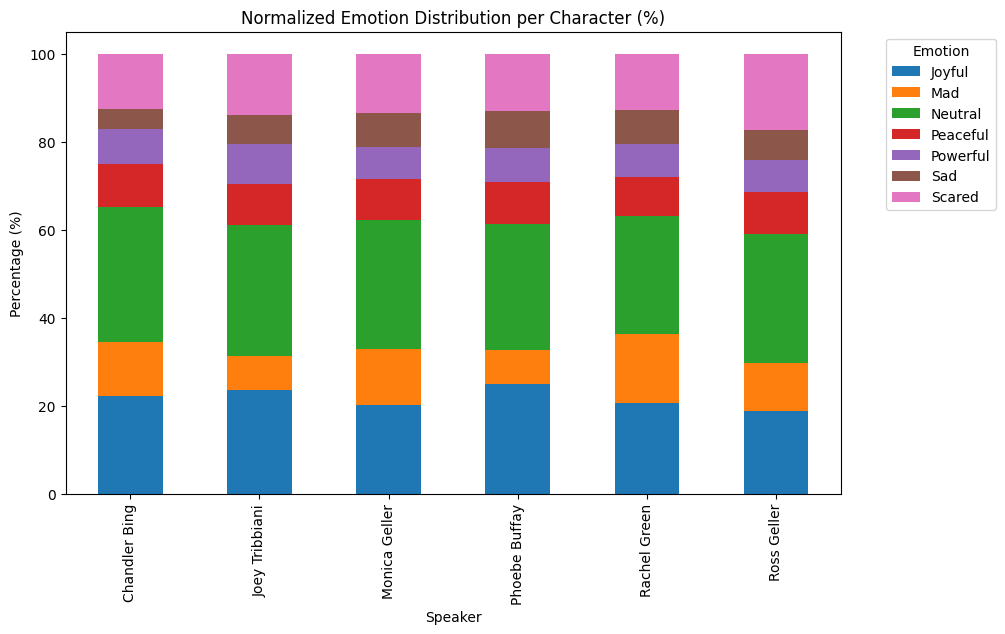

In [61]:

# Pivot so each row = speaker, each column = emotion
pivot = (
    emotion_counts
    .pivot(index="speaker", columns="emotion", values="count")
    .fillna(0)
)

# Normalize each row to 100%
pivot_norm = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Plot normalized stacked bar
pivot_norm.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    title="Normalized Emotion Distribution per Character (%)"
)

plt.xlabel("Speaker")
plt.ylabel("Percentage (%)")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [63]:

# 1️⃣ Filter out Neutral
non_neutral = emotion_counts[emotion_counts["emotion"] != "Neutral"]

# 2️⃣ Pivot and normalize (to percentages)
pivot = (
    emotion_counts
    .pivot(index="speaker", columns="emotion", values="count")
    .fillna(0)
)

pivot_norm = pivot.div(pivot.sum(axis=1), axis=0) * 100

# 3️⃣ Melt pivot_norm back into long form for easier grouping
pivot_norm_long = (
    pivot_norm.reset_index()
    .melt(id_vars="speaker", var_name="emotion", value_name="proportion")
)

# 4️⃣ Filter out Neutral (again, just to be sure)
pivot_norm_non_neutral = pivot_norm_long[pivot_norm_long["emotion"] != "Neutral"]

# 5️⃣ Get the top non-neutral emotion per speaker (by proportion)
top_non_neutral_norm = (
    pivot_norm_non_neutral.loc[
        pivot_norm_non_neutral.groupby("speaker")["proportion"].idxmax()
    ]
    .reset_index(drop=True)
)

top_non_neutral_norm

,speaker,emotion,proportion
0,Chandler Bing,Joyful,22.089041
1,Joey Tribbiani,Joyful,23.484365
2,Monica Geller,Joyful,20.086260
3,Phoebe Buffay,Joyful,24.839125
4,Rachel Green,Joyful,20.489691
5,Ross Geller,Joyful,18.807870


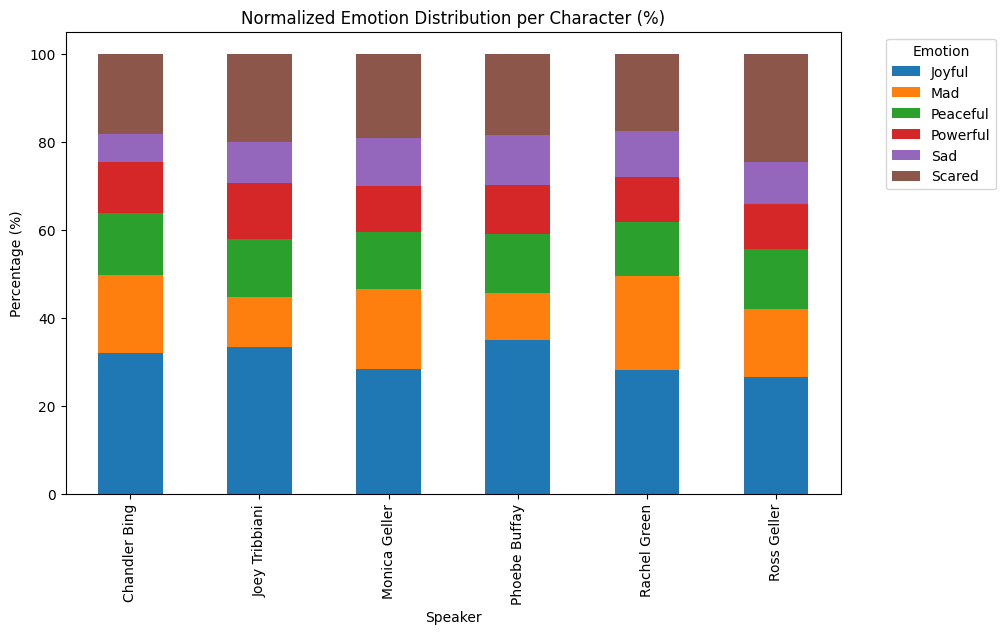

In [64]:
non_neutral = emotion_counts[emotion_counts["emotion"] != "Neutral"]

# Pivot so each row = speaker, each column = emotion
pivot = (
    non_neutral
    .pivot(index="speaker", columns="emotion", values="count")
    .fillna(0)
)

# Normalize each row to 100%
pivot_norm = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Plot normalized stacked bar
pivot_norm.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    title="Normalized Emotion Distribution per Character (%)"
)

plt.xlabel("Speaker")
plt.ylabel("Percentage (%)")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [65]:
pivot_norm_no_neutral = pivot_norm.drop(columns="Neutral", errors="ignore")
pivot_norm_no_neutral.mean().sort_values(ascending=False)

emotion
Joyful      30.524816
Scared      19.682014
Mad         15.813203
Peaceful    13.238461
Powerful    11.054738
Sad          9.686768
dtype: float64

In [66]:
pivot_norm_long_sorted = (
    pivot_norm_no_neutral
    .reset_index()
    .melt(id_vars="speaker", var_name="emotion", value_name="proportion")
    .sort_values(["speaker", "proportion"], ascending=[True, False])
)

# Get the second emotion (rank 2)
pivot_norm_long_sorted["rank"] = pivot_norm_long_sorted.groupby("speaker")["proportion"].rank(ascending=False)
second_emotion = pivot_norm_long_sorted[pivot_norm_long_sorted["rank"] == 2]

second_emotion[["speaker", "emotion", "proportion"]]

,speaker,emotion,proportion
30,Chandler Bing,Scared,18.271605
31,Joey Tribbiani,Scared,19.981835
32,Monica Geller,Scared,19.180471
33,Phoebe Buffay,Scared,18.411552
10,Rachel Green,Mad,21.497797
35,Ross Geller,Scared,24.713584


In [81]:


emotion_by_season = (
    merged
    .query('emotion != "Neutral"')
    .groupby(["season", "emotion"])
    .size()
    .reset_index(name="count")
)

emotion_by_season.sort_values("season")

,season,emotion,count
0,1,Joyful,599
1,1,Mad,309
2,1,Peaceful,112
3,1,Powerful,125
4,1,Sad,155
5,1,Scared,357
6,2,Joyful,567
7,2,Mad,317
8,2,Peaceful,249
9,2,Powerful,189


In [82]:
pivot_season = (
    emotion_by_season
    .pivot(index="season", columns="emotion", values="count")
    .fillna(0)
)

In [83]:
pivot_season_norm = pivot_season.div(pivot_season.sum(axis=1), axis=0) * 100


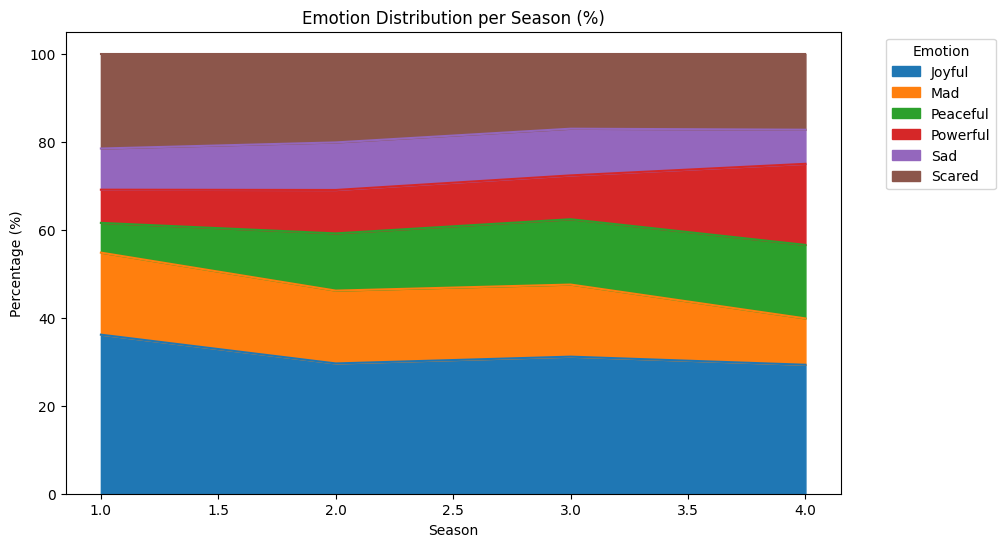

In [84]:


pivot_season_norm.plot.area(
    figsize=(10, 6),
    title="Emotion Distribution per Season (%)"
)

plt.xlabel("Season")
plt.ylabel("Percentage (%)")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [91]:
merged.query('emotion == "Peaceful"')["text"].values

array(['Ooh, steer clear of you.',
       "Grab a spoon. Do you know how long it's been since I've grabbed a spoon? Do the words 'Billy, don't be a hero' mean anything to you?",
       "Right. Thanks. It's June. I'm outta here.", ..., 'Thanks man.',
       'Okay man.', 'I know!'], shape=(1191,), dtype=object)